In [1]:
pip install pyarrow

     |████████████████████████████████| 17.3 MB 26.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install feather-format

  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2453 sha256=9399f0b77236d61bd766b40a298a564a29181509eca5c18ad317bbab462ee4fc
  Stored in directory: /home/ec2-user/.cache/pip/wheels/9d/90/64/88411837e80bb520d15ae395f39359a5413e7a00ae63397e10
Successfully built feather-format
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import json
import gzip
from urllib.request import urlopen
import feather 
import seaborn as sns

In [45]:
# function below prepares data by unzipping, dropping several columns that are full of nulls or unnecessary data for this
# particular analysis
def data_prep(data_name):
        
    file_name = f'{data_name}.json.gz'
    ### load the meta data
    data = []
    with gzip.open(file_name) as f:
        for l in f:
            data.append(json.loads(l.strip()))

    # convert list into pandas dataframe
    df = pd.DataFrame.from_dict(data)

    # drop columns containing nulls
    df = df.drop(columns=['reviewTime', 'asin', 'reviewerID', 'image', 'verified', 'style', 'summary', 'vote'])

    #print current shapes
    print(df.shape)
    
    feather_name = f'{data_name}.feather'

    # save in feather format
    df.to_feather(feather_name)


    #Convert unix timestamps to datetime.
    df['datetime'] = pd.to_datetime(df['unixReviewTime'],unit='s')
    
    # extract time-specific elements from datetime for further analysis    
    df['Weekday'] = df['datetime'].dt.dayofweek
    df['Month'] = df['datetime'].dt.month
    df['Day'] = df['datetime'].dt.day
    df['Year'] = df['datetime'].dt.year
    df['Quarter'] = df['datetime'].dt.quarter
    
    #drop the rows containing a null (should be a few hundred max)
    df = df.dropna()

## deprecated - previously used to set datetime as the index and convert based on the index

#     #Set the 'datetime' field to be the index.
#     df.set_index('datetime',inplace=True)

#     #Extract the month from the index.
#     df['Month'] = df.index.month

#     #Extract the year from the index.
#     df['Year'] = df.index.year
    
#     df['Day'] = df.index.day



    # shape should be 4-5+ more columsn depending on how many features you added above
    print(df.shape)
    
    return df

### Timing of Review Postings in "All Beauty"

In [46]:
df_beauty = data_prep('All_Beauty')

(371345, 4)
(370908, 10)


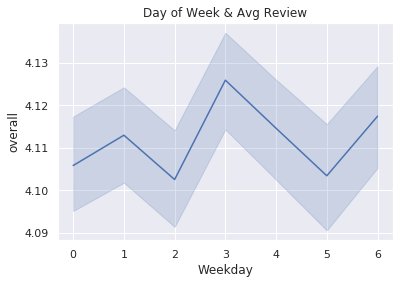

In [54]:
# day of week
sns.set(style='darkgrid')
sns.lineplot(x = "Weekday", y = "overall", data=df_beauty).set_title('Day of Week & Avg Review');

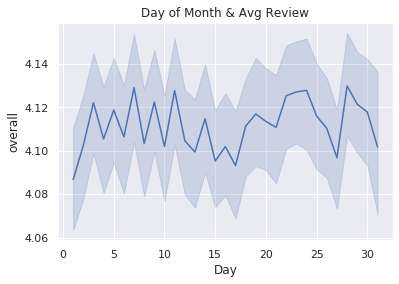

In [55]:
# day of month
sns.set(style='darkgrid')
sns.lineplot(x = "Day", y = "overall", data=df_beauty).set_title('Day of Month & Avg Review');

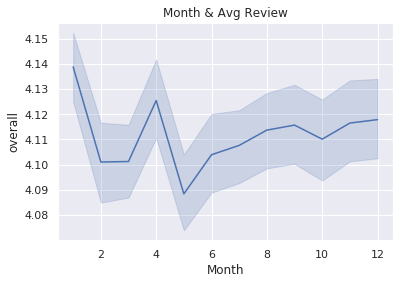

In [56]:
# month of year
sns.set(style='darkgrid')
sns.lineplot(x = "Month", y = "overall", data=df_beauty).set_title('Month & Avg Review');

### Timing of Review Postings in "Amazon Fashion"

In [58]:
df_fashion = data_prep('AMAZON_FASHION')

(883636, 4)
(882313, 10)


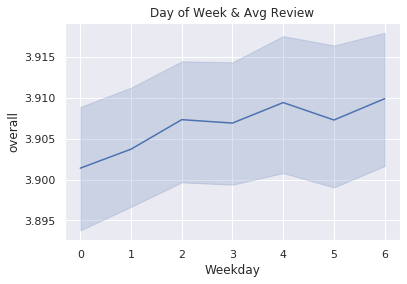

In [62]:
# day of week
sns.set(style='darkgrid')
sns.lineplot(x = "Weekday", y = "overall", data=df_fashion).set_title('Day of Week & Avg Review');

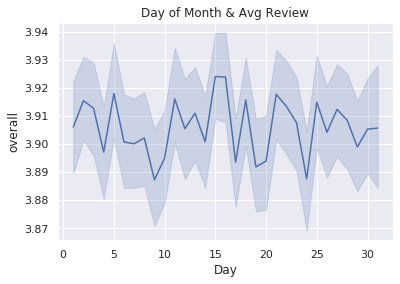

In [63]:
# day of month
sns.set(style='darkgrid')
sns.lineplot(x = "Day", y = "overall", data=df_fashion).set_title('Day of Month & Avg Review');

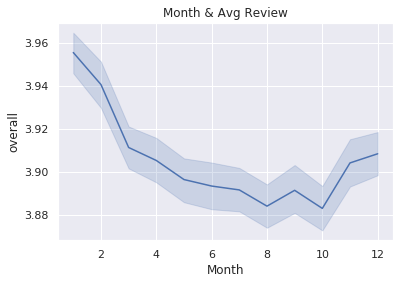

In [64]:
# month of year
sns.set(style='darkgrid')
sns.lineplot(x = "Month", y = "overall", data=df_fashion).set_title('Month & Avg Review');

### Timing of Review Postings in "Appliances"

In [66]:
df_appliances = data_prep('Appliances')

(602777, 4)
(602438, 10)


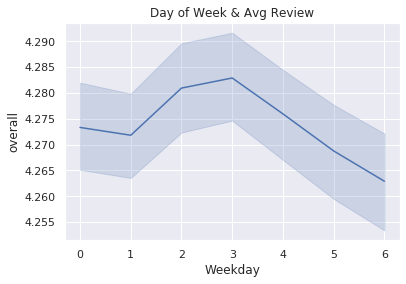

In [67]:
# day of week
sns.set(style='darkgrid')
sns.lineplot(x = "Weekday", y = "overall", data=df_appliances).set_title('Day of Week & Avg Review');

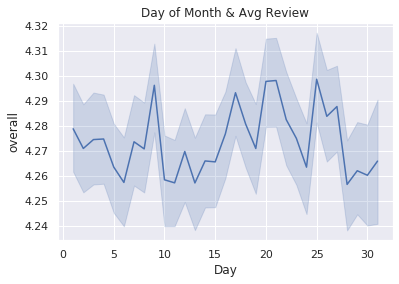

In [68]:
# day of month
sns.set(style='darkgrid')
sns.lineplot(x = "Day", y = "overall", data=df_appliances).set_title('Day of Month & Avg Review');

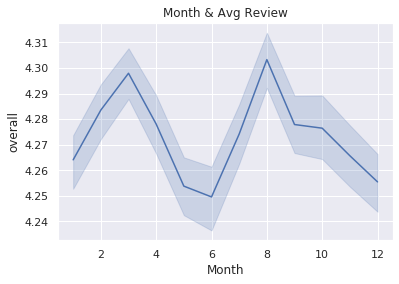

In [69]:
# month of year
sns.set(style='darkgrid')
sns.lineplot(x = "Month", y = "overall", data=df_appliances).set_title('Month & Avg Review');

### Timing of Review Postings in "Musical Instruments"

In [70]:
df_instruments = data_prep('Musical_Instruments')

(1512530, 4)
(1511526, 10)


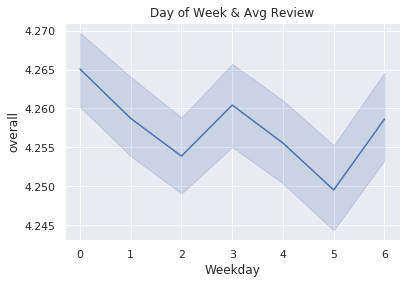

In [71]:
# day of week
sns.set(style='darkgrid')
sns.lineplot(x = "Weekday", y = "overall", data=df_instruments).set_title('Day of Week & Avg Review');

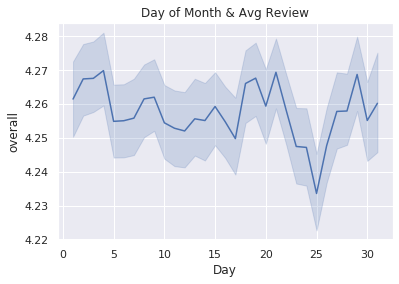

In [72]:
# day of month
sns.set(style='darkgrid')
sns.lineplot(x = "Day", y = "overall", data=df_instruments).set_title('Day of Month & Avg Review');

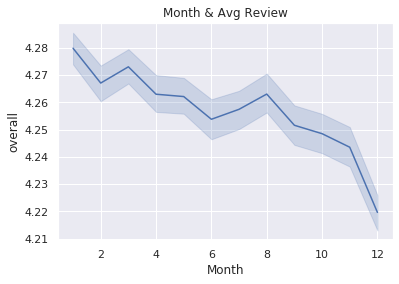

In [73]:
# month of year
sns.set(style='darkgrid')
sns.lineplot(x = "Month", y = "overall", data=df_instruments).set_title('Month & Avg Review');

### Timing of Review Postings in "Prime Pantry"

In [74]:
df_pantry = data_prep('Prime_Pantry')

(471614, 4)
(471197, 10)


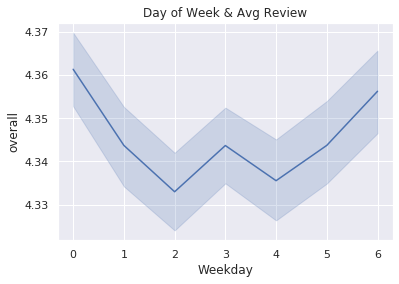

In [75]:
# day of week
sns.set(style='darkgrid')
sns.lineplot(x = "Weekday", y = "overall", data=df_pantry).set_title('Day of Week & Avg Review');

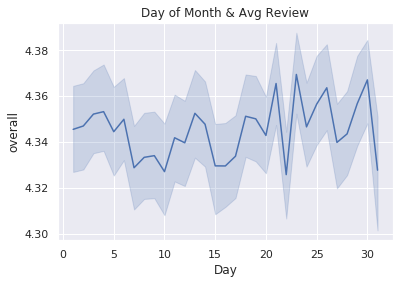

In [76]:
# day of month
sns.set(style='darkgrid')
sns.lineplot(x = "Day", y = "overall", data=df_pantry).set_title('Day of Month & Avg Review');

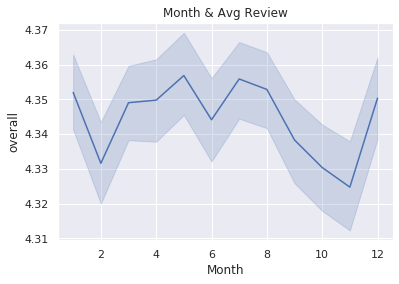

In [77]:
# month of year
sns.set(style='darkgrid')
sns.lineplot(x = "Month", y = "overall", data=df_pantry).set_title('Month & Avg Review');

### Timing of Review Postings in "Software"

In [78]:
df_software = data_prep('Software')

(459436, 4)
(459346, 10)


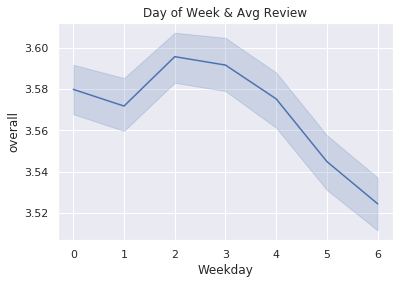

In [79]:
# day of week
sns.set(style='darkgrid')
sns.lineplot(x = "Weekday", y = "overall", data=df_software).set_title('Day of Week & Avg Review');

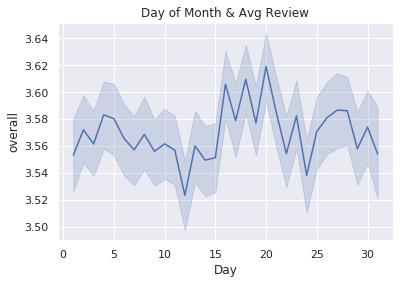

In [80]:
# day of month
sns.set(style='darkgrid')
sns.lineplot(x = "Day", y = "overall", data=df_software).set_title('Day of Month & Avg Review');

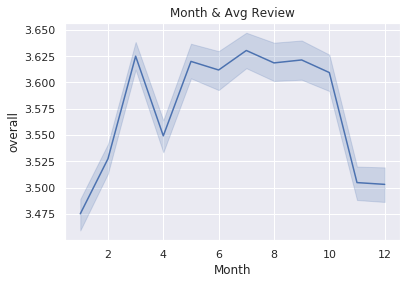

In [81]:
# month of year
sns.set(style='darkgrid')
sns.lineplot(x = "Month", y = "overall", data=df_software).set_title('Month & Avg Review');

### Initial Observations:
- As you can see visually above and numerically below, the average software review is significantly lower than Prime Pantry reviews. I'm curious to dig deeper into the reviews themselves - length, complexity, specific language used - to determine why this might be

In [91]:
mean_1 = df_software['overall'].mean()
print(f'AVG of software ratings: {mean_1:.2f}')

mean_2 = df_pantry['overall'].mean()
print(f'AVG of Prime Pantry ratings: {mean_2:.2f}')

print(f'Difference: {mean_2 - mean_1:.2f}')

AVG of software ratings: 3.57
AVG of Prime Pantry ratings: 4.35
Difference: 0.78


In [88]:
df_software.describe()

,overall,unixReviewTime,Weekday,Month,Day,Year,Quarter
count,459346.000000,4.593460e+05,459346.000000,459346.000000,459346.000000,459346.000000,459346.000000
mean,3.570021,1.369677e+09,2.902446,5.967656,15.568604,2012.950793,2.324651
std,1.626698,1.150192e+08,1.993332,3.567248,8.812521,3.663534,1.151624
min,1.000000,9.127296e+08,0.000000,1.000000,1.000000,1998.000000,1.000000
25%,2.000000,1.322179e+09,1.000000,3.000000,8.000000,2011.000000,1.000000
50%,4.000000,1.405728e+09,3.000000,5.000000,16.000000,2014.000000,2.000000
75%,5.000000,1.448237e+09,5.000000,9.000000,23.000000,2015.000000,3.000000
max,5.000000,1.538438e+09,6.000000,12.000000,31.000000,2018.000000,4.000000


In [89]:
df_pantry.describe()

,overall,unixReviewTime,Weekday,Month,Day,Year,Quarter
count,471197.000000,4.711970e+05,471197.000000,471197.000000,471197.000000,471197.000000,471197.000000
mean,4.345259,1.469252e+09,2.848501,6.317721,15.724115,2016.076433,2.442429
std,1.184965,4.329122e+07,1.980908,3.441465,8.809411,1.412723,1.113607
min,1.000000,1.073693e+09,0.000000,1.000000,1.000000,2004.000000,1.000000
25%,4.000000,1.447718e+09,1.000000,3.000000,8.000000,2015.000000,1.000000
50%,5.000000,1.475280e+09,3.000000,6.000000,16.000000,2016.000000,2.000000
75%,5.000000,1.499386e+09,5.000000,9.000000,23.000000,2017.000000,3.000000
max,5.000000,1.538611e+09,6.000000,12.000000,31.000000,2018.000000,4.000000
